# Laboratorio 6 - Analisis de Paquetes de Red

### Oscar Fernando López Barrios
### Carné 20679

In [233]:
from scapy.all import *
import pandas as pd
import numpy as np 
import binascii
import seaborn as sns
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP
import matplotlib.pyplot as plt

Análisis de paquetes

In [234]:
num_of_packets_to_sniff = 10
pcap = sniff(count=num_of_packets_to_sniff)

print(type(pcap))
print(len(pcap))
print(pcap)
pcap[0]

<class 'scapy.plist.PacketList'>
10
<Sniffed: TCP:7 UDP:3 ICMP:0 Other:0>


<Ether  dst=94:e6:f7:a6:6f:d5 src=e8:ed:d6:f6:c5:f5 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=240 id=45441 flags=DF frag=0 ttl=50 proto=udp chksum=0x9339 src=66.22.231.47 dst=192.168.25.84 |<UDP  sport=50002 dport=52312 len=220 chksum=0x7539 |<Raw  load="\\x90x)\\xe3<F\\xe8/\x00\x00\\x82\x14\\xbe\\xde\x00\x01x\\x98\\xff\\xec\\xd2V`s\\xac\\x9a=\\xf3\\xd1\\xd4\x1e\\xf1Q\\x9e\\x96\\x85HNi\x7f\\x80\x08§#\\xecR\\x8c\\xf4E\x027y>\\x99\\xb0G'\\xfbe\\xd8\r!f\\xf7\\xb3!\\xb8J\\xba\\xe2,0\x16\\xe9\\xef.\\xea\x03\\xe4\\xaaū\\x8dH\\x9f\\x92L\\xb1<\x1a\\x9cR\\xeaHLJ\\xee\x05*z\\xbc\\xe6' \\xbed\\xbf\\xa1^\\xc7.\\x84\\xa5{l9\x08\x01\\xce<\x1a\\xaaN\\xce\\xe8\\xa2\x10:vAgGi\nnO\\xed\\x86T\\x9cH\\xf5wl\\x8cL\\xc6\\xf9\t\x12\\xaf\x18\\xc9\x17\x12\\xf1v\\x9e2'j\\xc4eȀ|\\xe9;<\\xc8\\xccܱW\\xd4r\x11\x10)s\\xb5l\x1b'\x05\\xa3\\xda\\xcaX\\xb0\\x87!M\\xb7J\x08\\x89e\\xe5\\x84\\xf8\\xda\\xeb\\xea\\xdaߢ\x1a\x10\x03\x00" |>>>>

In [235]:
ethernet_frame = pcap[0]
ip_packet = ethernet_frame.payload
segment = ip_packet.payload
data = segment.payload

print("Informacion del frame:")
print(ethernet_frame.summary())

print("Informacion del paquete:")
print(ip_packet.summary())

print("Informacion del segmento:")
print(segment.summary())

print("Data:")
print(data.summary())

ethernet_frame.show()
data.show()

Informacion del frame:
Ether / IP / UDP 66.22.231.47:50002 > 192.168.25.84:52312 / Raw
Informacion del paquete:
IP / UDP 66.22.231.47:50002 > 192.168.25.84:52312 / Raw
Informacion del segmento:
UDP 66.22.231.47:50002 > 192.168.25.84:52312 / Raw
Data:
Raw
###[ Ethernet ]### 
  dst       = 94:e6:f7:a6:6f:d5
  src       = e8:ed:d6:f6:c5:f5
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 240
     id        = 45441
     flags     = DF
     frag      = 0
     ttl       = 50
     proto     = udp
     chksum    = 0x9339
     src       = 66.22.231.47
     dst       = 192.168.25.84
     \options   \
###[ UDP ]### 
        sport     = 50002
        dport     = 52312
        len       = 220
        chksum    = 0x7539
###[ Raw ]### 
           load      = "\\x90x)\\xe3<F\\xe8/\x00\x00\\x82\x14\\xbe\\xde\x00\x01x\\x98\\xff\\xec\\xd2V`s\\xac\\x9a=\\xf3\\xd1\\xd4\x1e\\xf1Q\\x9e\\x96\\x85HNi\x7f\\x80\x08§#\\xecR\\x8c\\xf4E\x027y>\\x99\\xb0G'\

In [236]:
print(type(ethernet_frame))
print(type(ip_packet))
print(type(segment))

ethernet_type = type(ethernet_frame)
ip_type = type(ip_packet)
tcp_type = type(segment)
print("Ethernet",pcap[ethernet_type])
print("IP", pcap[ip_type])
print("TCP", pcap[tcp_type])

print("UDP", pcap[UDP])

<class 'scapy.layers.l2.Ether'>
<class 'scapy.layers.inet.IP'>
<class 'scapy.layers.inet.UDP'>
Ethernet <Ether from Sniffed: TCP:7 UDP:3 ICMP:0 Other:0>
IP <IP from Sniffed: TCP:7 UDP:3 ICMP:0 Other:0>
TCP <UDP from Sniffed: TCP:0 UDP:3 ICMP:0 Other:0>
UDP <UDP from Sniffed: TCP:0 UDP:3 ICMP:0 Other:0>


1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.
2. Convierta la variable a un DataFrame

In [237]:
pcap_file = "analisis_paquetes.pcap"
packets = rdpcap(pcap_file)

In [238]:
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

for packet in packets:
    field_values = []
    for field in ip_fields:
        if field == 'options':
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])

    field_values.append(packet.time)

    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)

    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    dataframe = pd.concat([dataframe, df_append], axis=0)

3. Muestre el contenido de las primeras 5 filas del dataset

In [239]:
dataframe = dataframe.reset_index()
dataframe = dataframe.drop(columns="index")

print(dataframe.head(5))

  version ihl tos  len     id flags frag  ttl proto chksum  ... dataofs  \
0       4   5   0  246   3462    DF    0   51    17  13871  ...    None   
1       4   5   0  151   3464    DF    0   51    17  13964  ...    None   
2       4   5   0  151   3466    DF    0   51    17  13962  ...    None   
3       4   5   0  125  46082    DF    0  128     6      0  ...       5   
4       4   5   0   40   5542    DF    0   64     6   9635  ...       5   

  reserved flags window chksum urgptr options payload  \
0     None  None   None  22753   None    None     218   
1     None  None   None  64548   None    None     123   
2     None  None   None  13396   None    None     123   
3        0    PA    510  65526      0       0      85   
4        0     A    158  12420      0    None       2   

                                         payload_raw  \
0  b"\x90x\xed\xc7T\xaa\x83\xb2\x00\x00\x7f\xc1\x...   
1  b"\x90x\xe3\xbd\xb0\x80|i\x00\x00\x7f\xb9\xbe\...   
2  b'\x90x\xe3\xbe\xb0\x80\x80)\x00\x0

4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port
5. Estadísticas

In [240]:
dataframe[['src','dst','sport','dport']]

,src,dst,sport,dport
0,66.22.231.47,192.168.25.84,50002,64532
1,66.22.231.47,192.168.25.84,50002,64532
2,66.22.231.47,192.168.25.84,50002,64532
3,192.168.25.84,162.159.130.235,57395,443
4,162.159.130.235,192.168.25.84,443,57395
...,...,...,...,...
563,84.54.22.33,10.1.10.53,53,53
564,10.1.10.53,84.54.22.33,53,53
565,84.54.22.33,10.1.10.53,53,53
566,10.1.10.53,84.54.22.33,53,53


In [241]:
print("Dirección Origen más frecuente")
print(dataframe['src'].describe(),'\n\n')

Dirección Origen más frecuente
count            568
unique             6
top       10.1.10.53
freq             279
Name: src, dtype: object 




In [242]:
print("Dirección Destino más frecuente")
print(dataframe['dst'].describe(),'\n\n')

Dirección Destino más frecuente
count            568
unique             6
top       10.1.10.53
freq             279
Name: dst, dtype: object 




In [243]:
print("IP más frecuente:")
frequent_address = dataframe['src'].describe()['top']
print(frequent_address)

print(dataframe[dataframe['src'] == frequent_address]['dst'].unique())

IP más frecuente:
10.1.10.53
['84.54.22.33' '75.75.75.75']


In [244]:
print("Puerto Origen más frecuente")
print(dataframe['sport'].describe(),'\n\n')

Puerto Origen más frecuente
count     568
unique      7
top        53
freq      540
Name: sport, dtype: int64 




In [245]:
print("Puerto Destino más frecuente")
print(dataframe['dport'].describe(),'\n\n')

Puerto Destino más frecuente
count     568
unique      7
top        53
freq      540
Name: dport, dtype: int64 




6. Gráficas

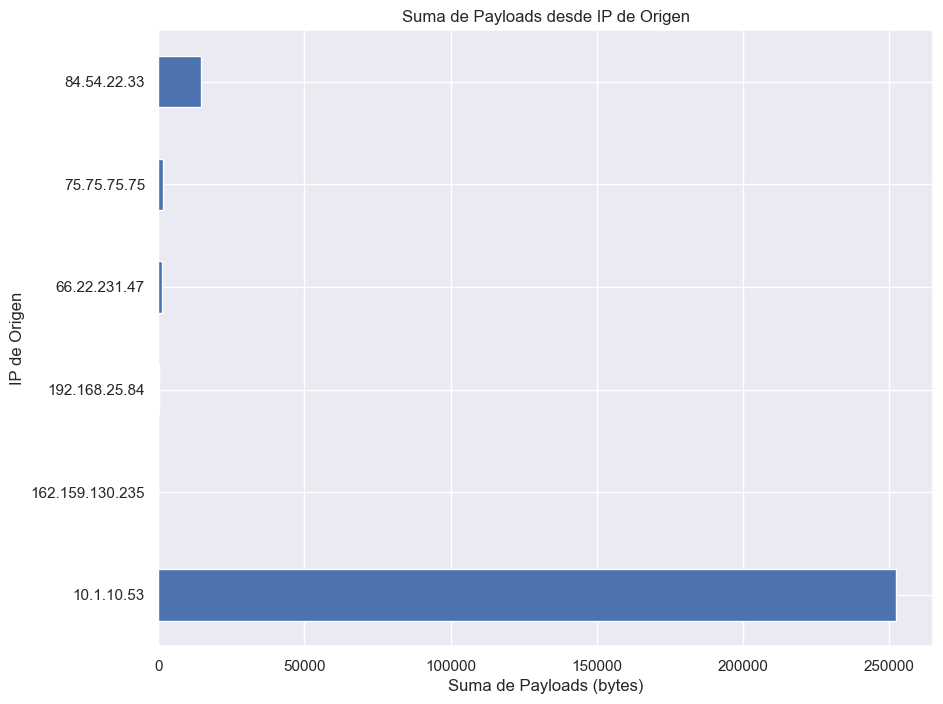

In [246]:
sum_payloads_by_src_ip = dataframe.groupby('src')['payload'].sum()

plt.figure(figsize=(10, 8))
sum_payloads_by_src_ip.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IP de Origen')
plt.title('Suma de Payloads desde IP de Origen')
plt.show()

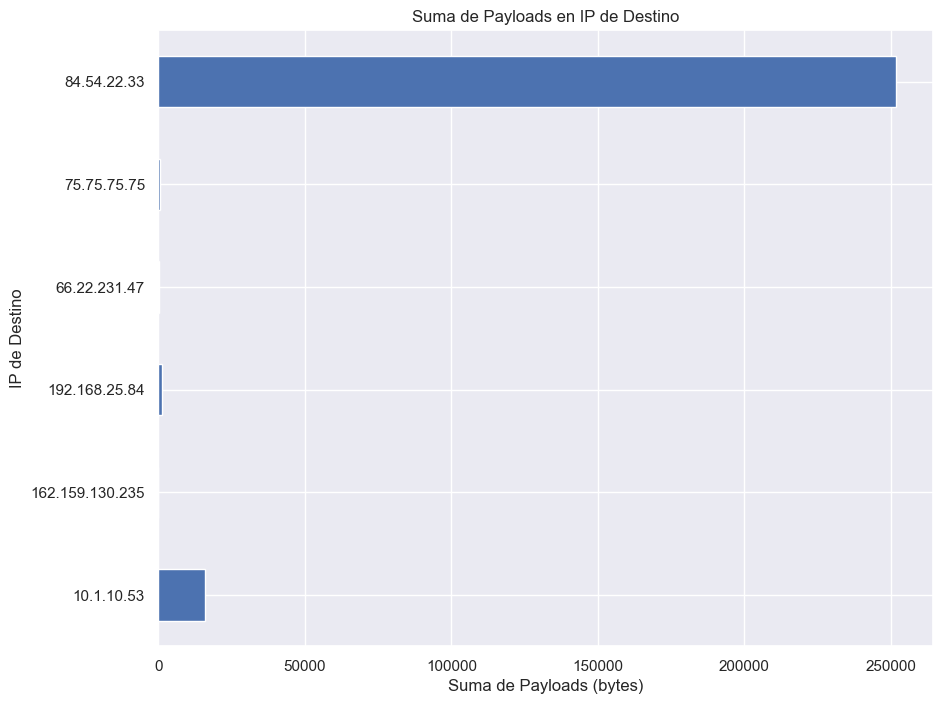

In [247]:
sum_payloads_by_dst_ip = dataframe.groupby('dst')['payload'].sum()

plt.figure(figsize=(10, 8))
sum_payloads_by_dst_ip.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IP de Destino')
plt.title('Suma de Payloads en IP de Destino')
plt.show()

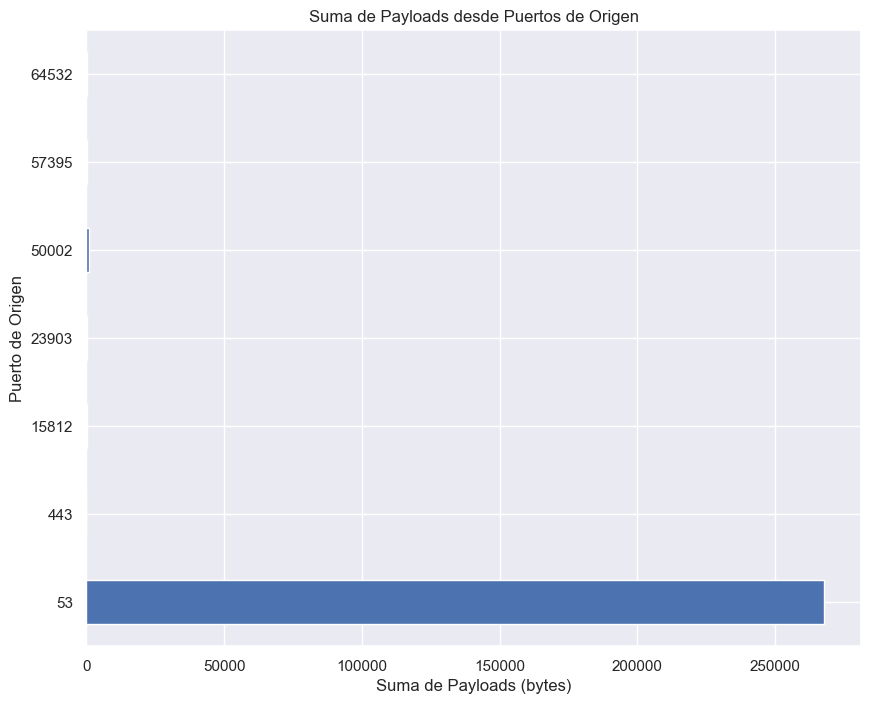

In [248]:
sum_payloads_by_src_port = dataframe.groupby('sport')['payload'].sum()

plt.figure(figsize=(10, 8))
sum_payloads_by_src_port.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puerto de Origen')
plt.title('Suma de Payloads desde Puertos de Origen')
plt.show()

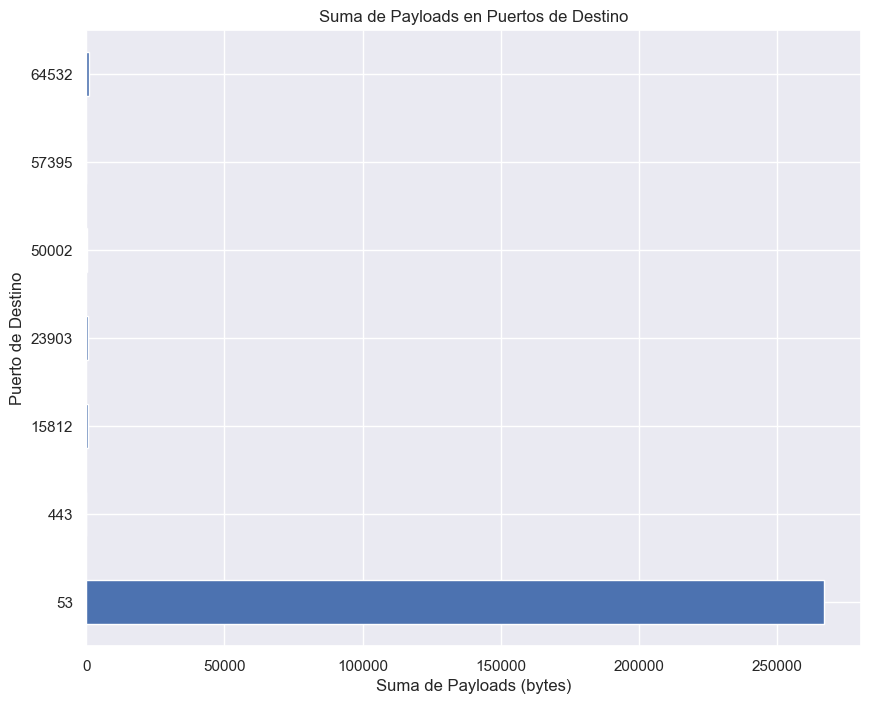

In [249]:
sum_payloads_by_dst_port = dataframe.groupby('dport')['payload'].sum()

plt.figure(figsize=(10, 8))
sum_payloads_by_dst_port.plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puerto de Destino')
plt.title('Suma de Payloads en Puertos de Destino')
plt.show()

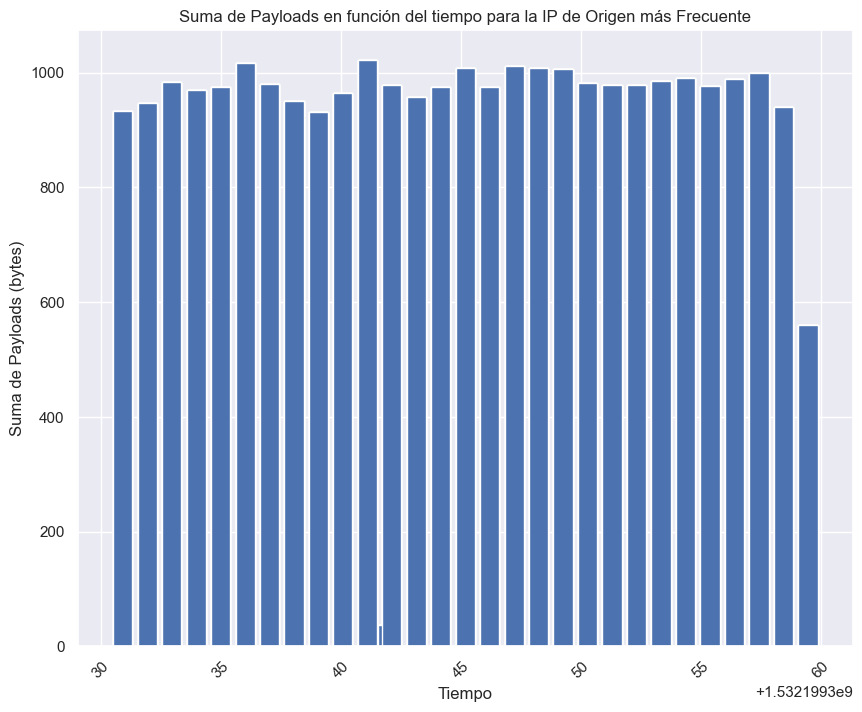

In [250]:
frequent_src_ip_data = dataframe[dataframe['src'] == frequent_address]

plt.figure(figsize=(10, 8))
plt.bar(frequent_src_ip_data['time'], frequent_src_ip_data['payload'])
plt.xlabel('Tiempo')
plt.ylabel('Suma de Payloads (bytes)')
plt.title('Suma de Payloads en función del tiempo para la IP de Origen más Frecuente')
plt.xticks(rotation=45)
plt.show()

En este caso en la suma de los payloads en los diferentes puertos que se tienen, se puede observar que distintos puestos directamente tienen la mayor cantidad de payloads.

7. Investigación del Payload

In [251]:
frequent_src_ip_df = dataframe[dataframe['src'] == frequent_address]
grouped_dst_payload_df = frequent_src_ip_df.groupby('dst')['payload'].sum().reset_index()
suspicious_dst_ip = grouped_dst_payload_df.loc[grouped_dst_payload_df['payload'].idxmax()]['dst']
suspicious_conversation_df = frequent_src_ip_df[frequent_src_ip_df['dst'] == suspicious_dst_ip]
payloads_array = suspicious_conversation_df['payload'].to_numpy()

In [252]:
payloads_array

array([933, 947, 984, 970, 975, 1017, 980, 951, 931, 964, 1023, 978, 958,
       976, 1009, 976, 1011, 1009, 1007, 982, 978, 978, 985, 991, 977,
       989, 999, 941, 560, 933, 947, 984, 970, 975, 1017, 980, 951, 931,
       964, 1023, 978, 958, 976, 1009, 976, 1011, 1009, 1007, 982, 978,
       978, 985, 991, 977, 989, 999, 941, 560, 933, 947, 984, 970, 975,
       1017, 980, 951, 931, 964, 1023, 978, 958, 976, 1009, 976, 1011,
       1009, 1007, 982, 978, 978, 985, 991, 977, 989, 999, 941, 560, 933,
       947, 984, 970, 975, 1017, 980, 951, 931, 964, 1023, 978, 958, 976,
       1009, 976, 1011, 1009, 1007, 982, 978, 978, 985, 991, 977, 989,
       999, 941, 560, 933, 947, 984, 970, 975, 1017, 980, 951, 931, 964,
       1023, 978, 958, 976, 1009, 976, 1011, 1009, 1007, 982, 978, 978,
       985, 991, 977, 989, 999, 941, 560, 933, 947, 984, 970, 975, 1017,
       980, 951, 931, 964, 1023, 978, 958, 976, 1009, 976, 1011, 1009,
       1007, 982, 978, 978, 985, 991, 977, 989, 999, 941, 5

In [253]:
for payload in payloads_array:
    print(str(payload)[:10])

933
947
984
970
975
1017
980
951
931
964
1023
978
958
976
1009
976
1011
1009
1007
982
978
978
985
991
977
989
999
941
560
933
947
984
970
975
1017
980
951
931
964
1023
978
958
976
1009
976
1011
1009
1007
982
978
978
985
991
977
989
999
941
560
933
947
984
970
975
1017
980
951
931
964
1023
978
958
976
1009
976
1011
1009
1007
982
978
978
985
991
977
989
999
941
560
933
947
984
970
975
1017
980
951
931
964
1023
978
958
976
1009
976
1011
1009
1007
982
978
978
985
991
977
989
999
941
560
933
947
984
970
975
1017
980
951
931
964
1023
978
958
976
1009
976
1011
1009
1007
982
978
978
985
991
977
989
999
941
560
933
947
984
970
975
1017
980
951
931
964
1023
978
958
976
1009
976
1011
1009
1007
982
978
978
985
991
977
989
999
941
560
933
947
984
970
975
1017
980
951
931
964
1023
978
958
976
1009
976
1011
1009
1007
982
978
978
985
991
977
989
999
941
560
933
947
984
970
975
1017
980
951
931
964
1023
978
958
976
1009
976
1011
1009
1007
982
978
978
985
991
977
989
999
941
560
933
947
984
970
975
1017

En este caso segun lo que se observa los payloads que se tienen no muestran ninguna irregularidad en el contenido que se presenta. Los datos que se ven son bytes de los payloads que se tienen.